In [1]:
import os, sys

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import skimage.io
from skimage.filters import threshold_triangle

In [2]:
tif_names = next(os.walk('./tiff_images/'))[2]

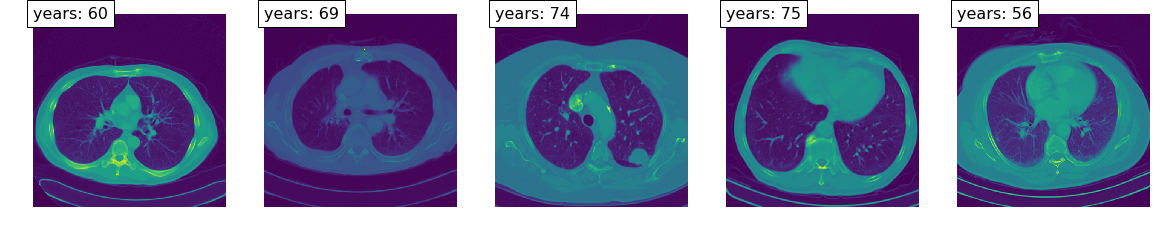

In [4]:
fig, ax = plt.subplots(1, 5, figsize=(20,8))
for i, tif_name in enumerate(tif_names[:5]):
    tif_img = skimage.io.imread('./tiff_images/' + tif_name)
    ax[i].imshow(tif_img)
    ax[i].text(0, 10,'years: {0}'.format(int(tif_name.split('_')[3])), 
               fontsize=16, bbox={'facecolor': 'white', 'pad': 6})
    ax[i].axis('off')

In [6]:
x_axis = []; y_axis = []; scl = []
for tif_name in tif_names:
    img = skimage.io.imread('./tiff_images/' + tif_name)
    scl.append(np.histogram(img, bins=100)[1][:100]) # get axis x histogram
    x_axis.append(np.histogram(img, bins=100)[0]) # get axis y histogram
    y_axis.append(int(tif_name.split('_')[3])) # get age

In [7]:
x_axis = np.array(x_axis)
y_axis = np.array(y_axis)
scl = np.array(scl).mean(axis=0)

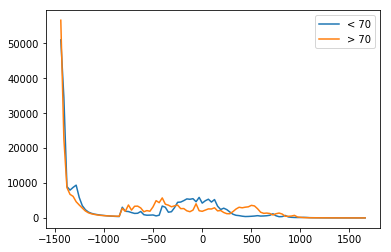

In [8]:
%matplotlib inline
sep = 70
plt.plot(scl, x_axis[y_axis<=sep].mean(axis=0), label='< {0}'.format(sep))
plt.plot(scl, x_axis[y_axis>=sep].mean(axis=0), label='> {0}'.format(sep))
plt.legend()

In [9]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from skimage.io import imread
import matplotlib.pyplot as plt
from glob import glob
import os

In [12]:
tif_file_df = pd.DataFrame([{'path': filepath} for filepath in glob('./tiff_images/*.tif')])
tif_file_df['file'] = tif_file_df['path'].map(os.path.basename)
tif_file_df['Contrast'] = tif_file_df['file'].map(lambda x: bool(x.split('_')[-2]))
tif_file_df['Age'] = tif_file_df['file'].map(lambda x: int(x.split('_')[3]))
tif_file_df.sample(10)

,path,file,Contrast,Age
8,./tiff_images\ID_0008_AGE_0051_CONTRAST_1_CT.tif,ID_0008_AGE_0051_CONTRAST_1_CT.tif,True,51
79,./tiff_images\ID_0079_AGE_0071_CONTRAST_0_CT.tif,ID_0079_AGE_0071_CONTRAST_0_CT.tif,True,71
27,./tiff_images\ID_0027_AGE_0064_CONTRAST_1_CT.tif,ID_0027_AGE_0064_CONTRAST_1_CT.tif,True,64
24,./tiff_images\ID_0024_AGE_0060_CONTRAST_1_CT.tif,ID_0024_AGE_0060_CONTRAST_1_CT.tif,True,60
83,./tiff_images\ID_0083_AGE_0082_CONTRAST_0_CT.tif,ID_0083_AGE_0082_CONTRAST_0_CT.tif,True,82
99,./tiff_images\ID_0099_AGE_0061_CONTRAST_0_CT.tif,ID_0099_AGE_0061_CONTRAST_0_CT.tif,True,61
4,./tiff_images\ID_0004_AGE_0056_CONTRAST_1_CT.tif,ID_0004_AGE_0056_CONTRAST_1_CT.tif,True,56
20,./tiff_images\ID_0020_AGE_0066_CONTRAST_1_CT.tif,ID_0020_AGE_0066_CONTRAST_1_CT.tif,True,66
26,./tiff_images\ID_0026_AGE_0070_CONTRAST_1_CT.tif,ID_0026_AGE_0070_CONTRAST_1_CT.tif,True,70
70,./tiff_images\ID_0070_AGE_0074_CONTRAST_0_CT.tif,ID_0070_AGE_0074_CONTRAST_0_CT.tif,True,74


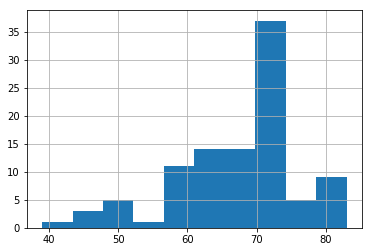

In [13]:
tif_file_df['Age'].hist()

Text(0.5,1,'Histogram\nAge: 74, Contrast: True')

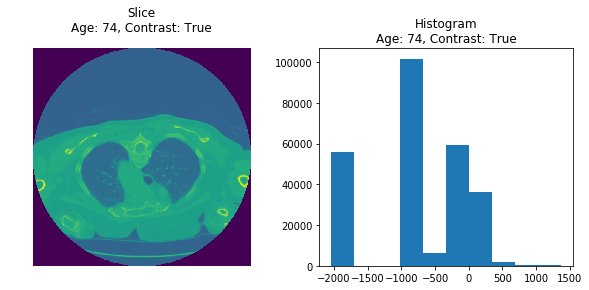

In [15]:
test_row = list(tif_file_df.sample(1).T.to_dict().values())[0] # grab a random row
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (10, 4))
test_row_img = imread(test_row['path'])
ax1.matshow(test_row_img)
ax1.set_title('Slice\nAge: {Age}, Contrast: {Contrast}'.format(**test_row))
ax1.axis('off')
ax2.hist(test_row_img.ravel())
ax2.set_title('Histogram\nAge: {Age}, Contrast: {Contrast}'.format(**test_row))